In [ ]:
import numpy as np
import openai
import asyncio
import aiohttp
import nest_asyncio
import re
import time
from datasets import load_from_disk
from sentence_transformers import SentenceTransformer,util
nest_asyncio.apply()
openai.api_key = "your_api_key_here"

{'accept reservations': 0, 'account blocked': 1, 'alarm': 2, 'application status': 3, 'apr': 4, 'are you a bot': 5, 'balance': 6, 'bill balance': 7, 'bill due': 8, 'book flight': 9, 'book hotel': 10, 'calculator': 11, 'calendar': 12, 'calendar update': 13, 'calories': 14, 'cancel': 15, 'cancel reservation': 16, 'car rental': 17, 'card declined': 18, 'carry on': 19, 'change accent': 20, 'change ai name': 21, 'change language': 22, 'change speed': 23, 'change user name': 24, 'change volume': 25, 'confirm reservation': 26, 'cook time': 27, 'credit limit': 28, 'credit limit change': 29, 'credit score': 30, 'current location': 31, 'damaged card': 32, 'date': 33, 'definition': 34, 'direct deposit': 35, 'directions': 36, 'distance': 37, 'do you have pets': 38, 'exchange rate': 39, 'expiration date': 40, 'find phone': 41, 'flight status': 42, 'flip coin': 43, 'food last': 44, 'freeze account': 45, 'fun fact': 46, 'gas': 47, 'gas type': 48, 'goodbye': 49, 'greeting': 50, 'how busy': 51, 'how ol

/var/folders/sv/t09lc4l93657c20yb6tqld_c0000gn/T/ipykernel_96558/4077070978.py:633: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_samples = random.sample(all_possible_indices, int(0.05 * len(large_inputs)))


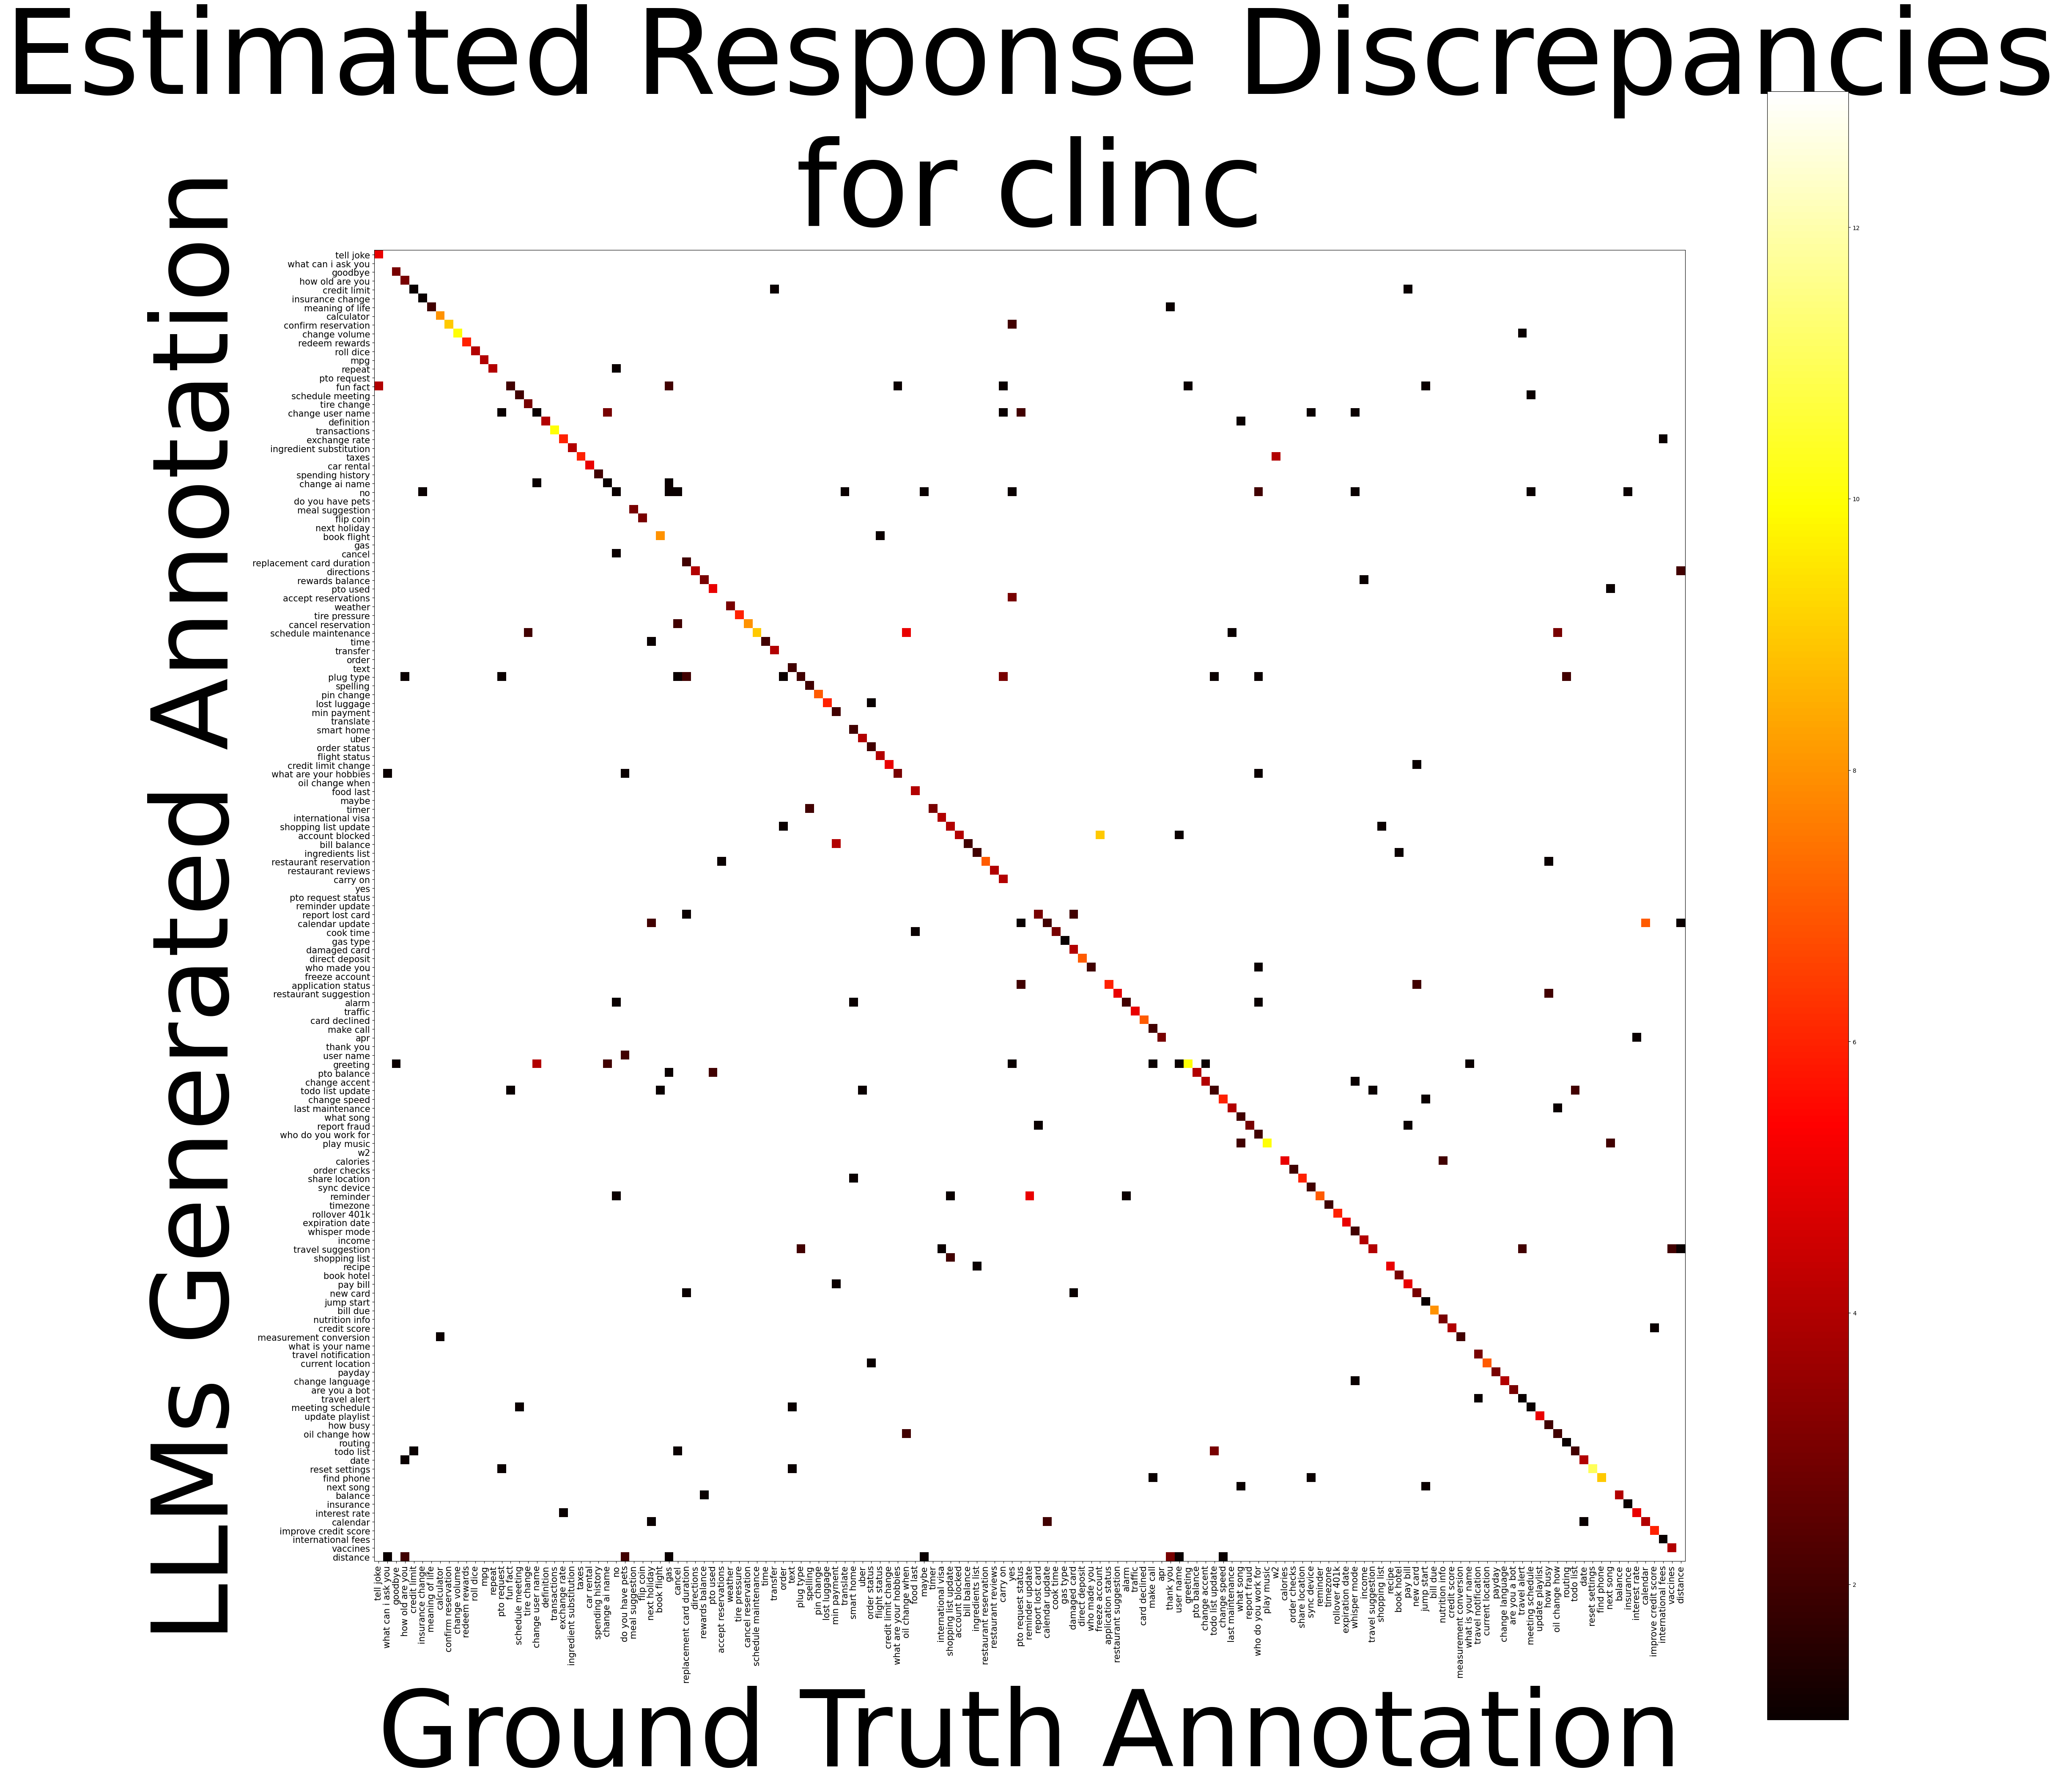

{'alarm': 0, 'audio': 1, 'calendar': 2, 'cooking': 3, 'datetime': 4, 'email': 5, 'general': 6, 'iot': 7, 'lists': 8, 'music': 9, 'news': 10, 'play': 11, 'qa': 12, 'recommendation': 13, 'social': 14, 'takeaway': 15, 'transport': 16, 'weather': 17}
400 Random Samples outside Whole_indices: [10476, 1824, 409, 4506, 4012, 3657, 2286, 1679, 11087, 8935, 1424, 9674, 6912, 520, 488, 1535, 3582, 3811, 8279, 9863, 434, 9195, 3257, 10647, 11490, 8928, 6873, 3611, 7359, 9654, 4557, 106, 2615, 11438, 6924, 5574, 4552, 2547, 3527, 5514, 1674, 1519, 6224, 1584, 5881, 5635, 9891, 4333, 711, 7527, 8785, 2045, 6201, 1291, 9044, 4803, 10299, 10133, 5925, 9459, 3150, 1139, 750, 10834, 3733, 4741, 1307, 3814, 1654, 6227, 4554, 7428, 10415, 5977, 2664, 6065, 5820, 3432, 10980, 4374, 11498, 11199, 10617, 1169, 9980, 10403, 2803, 8751, 4010, 2677, 7573, 6216, 4422, 10485, 11274, 9125, 3598, 11216, 5313, 916, 3752, 525, 5168, 6572, 4386, 1084, 3456, 9292, 5155, 3483, 10738, 8179, 6482, 10532, 7517, 2340, 4339

/var/folders/sv/t09lc4l93657c20yb6tqld_c0000gn/T/ipykernel_96558/4077070978.py:633: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_samples = random.sample(all_possible_indices, int(0.05 * len(large_inputs)))


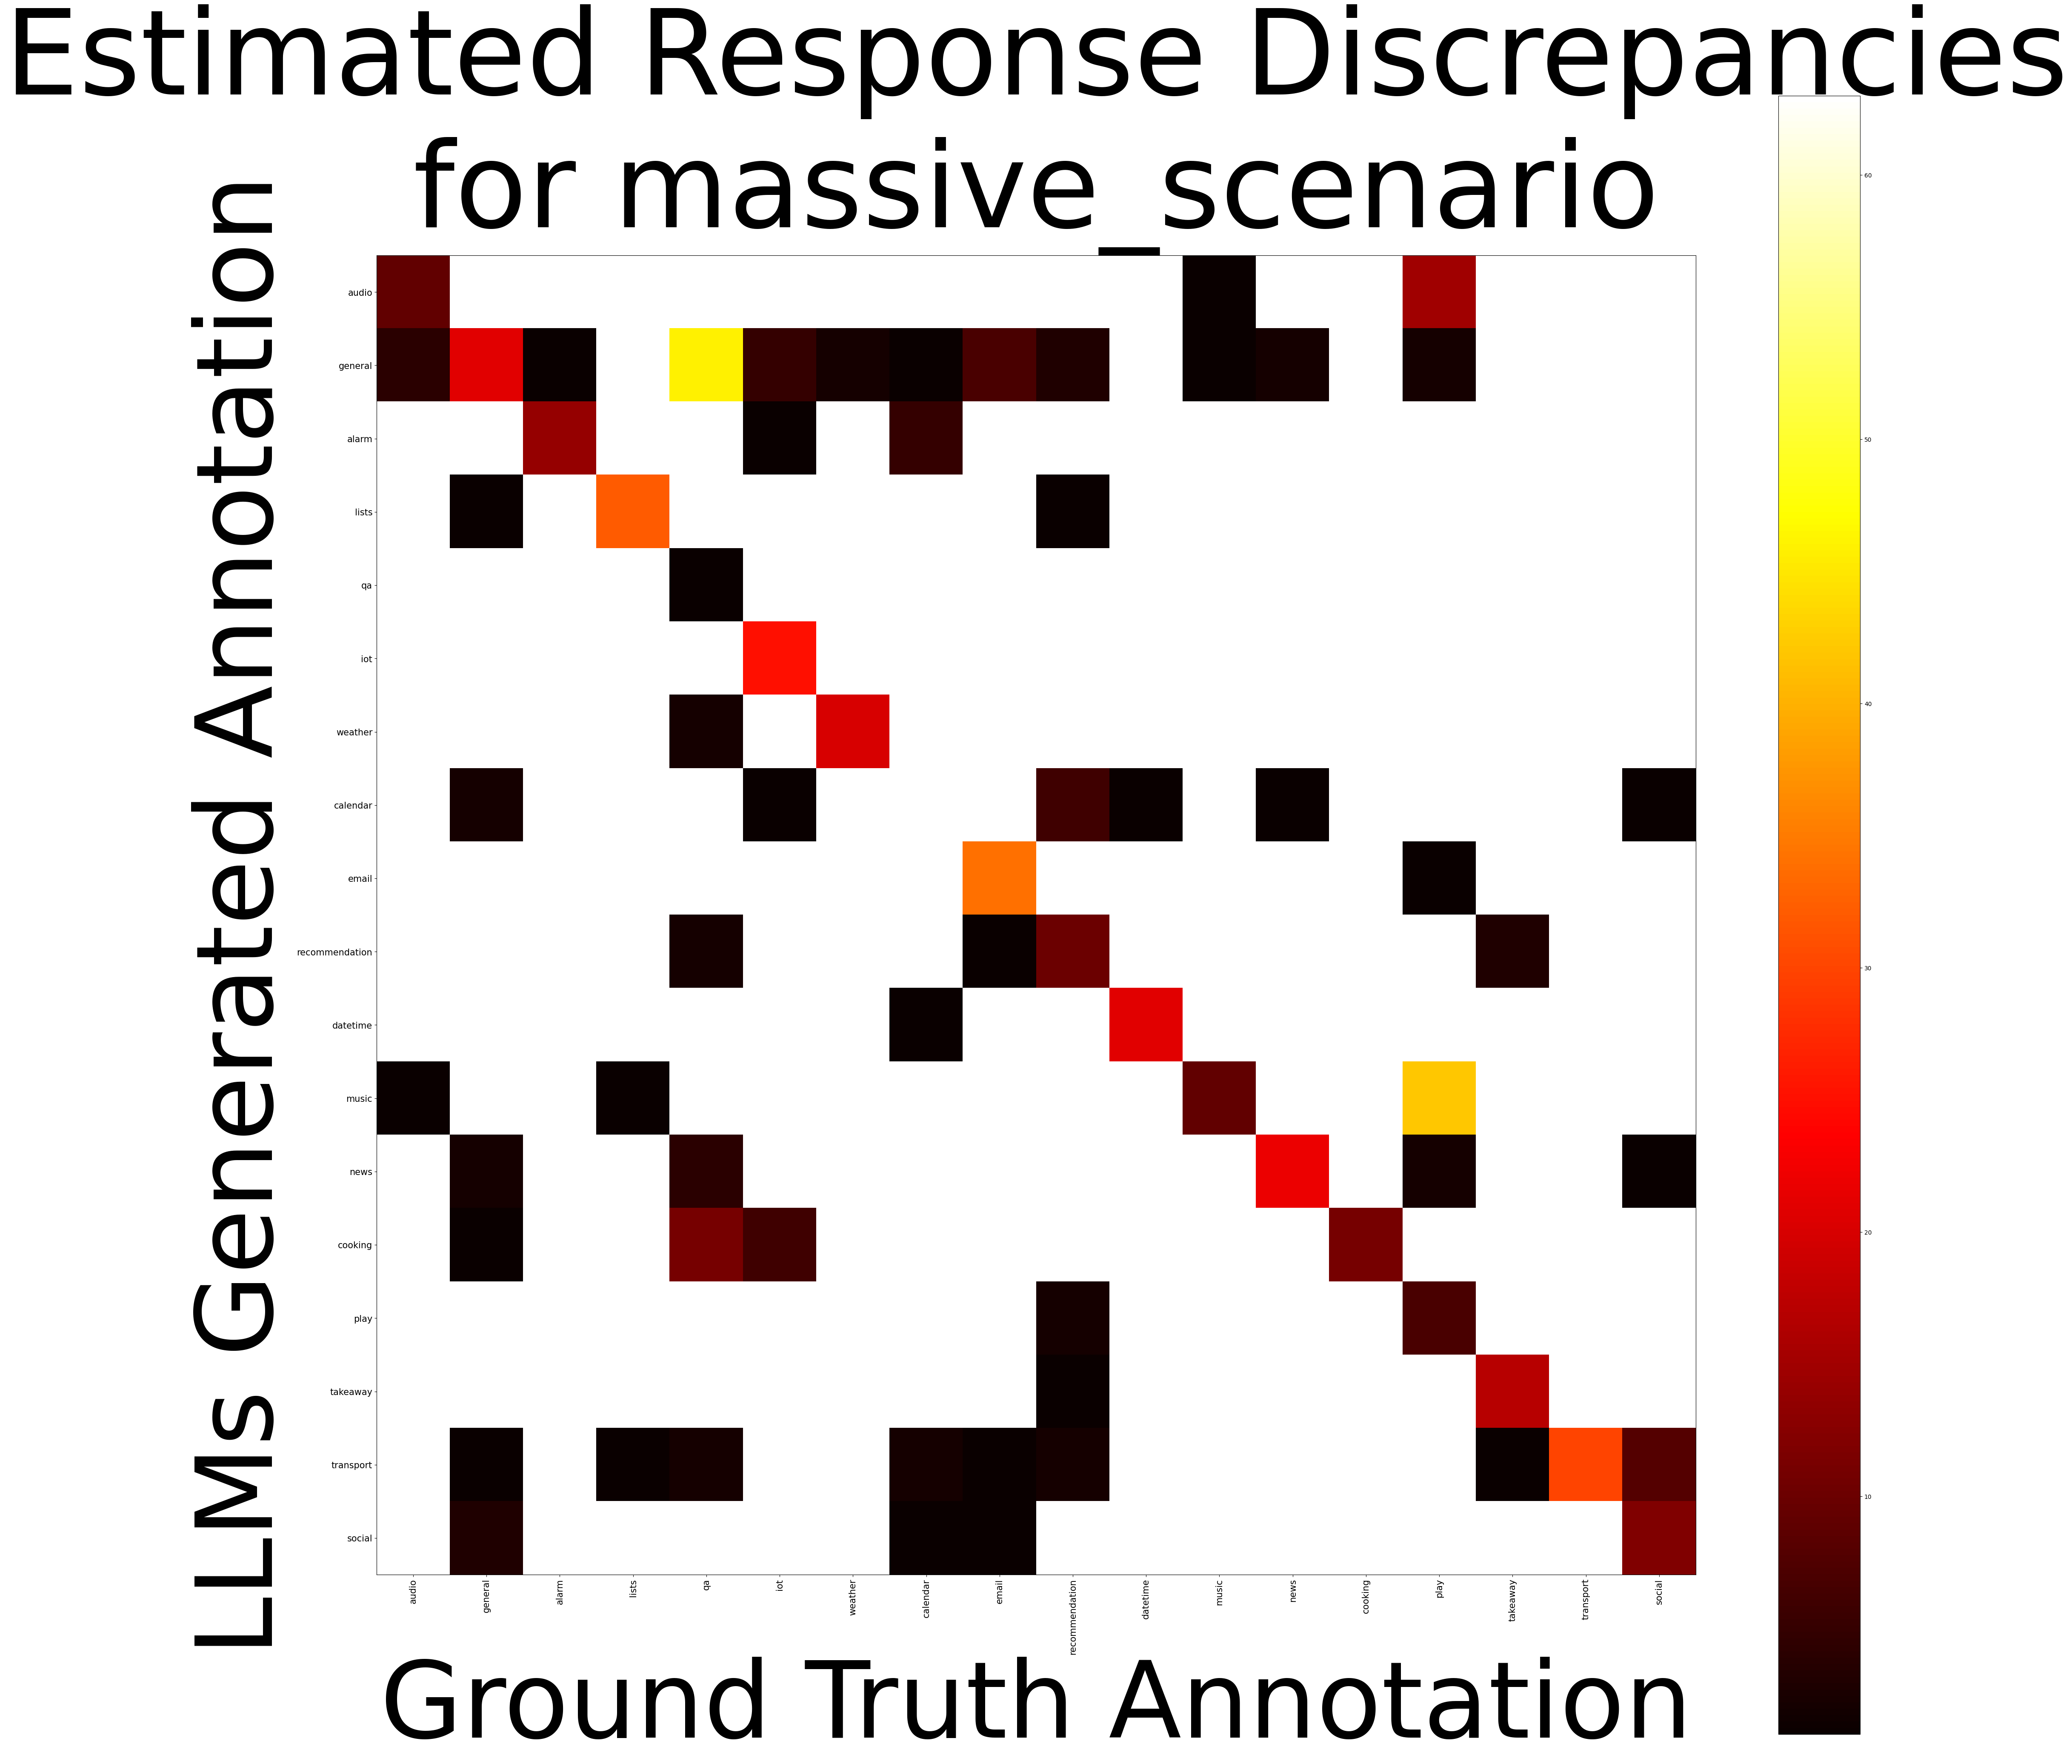

{'add time timer': 0, 'add to playlist music': 1, 'answer call': 2, 'cancel message': 3, 'create alarm': 4, 'create call': 5, 'create playlist music': 6, 'create reminder': 7, 'create timer': 8, 'delete alarm': 9, 'delete playlist music': 10, 'delete reminder': 11, 'delete timer': 12, 'dislike music': 13, 'end call': 14, 'fast forward music': 15, 'get age': 16, 'get alarm': 17, 'get attendee event': 18, 'get availability': 19, 'get call': 20, 'get call contact': 21, 'get call time': 22, 'get category event': 23, 'get contact': 24, 'get contact method': 25, 'get date time event': 26, 'get details news': 27, 'get education degree': 28, 'get education time': 29, 'get employer': 30, 'get employment time': 31, 'get event': 32, 'get info contact': 33, 'get info recipes': 34, 'get job': 35, 'get language': 36, 'get life event': 37, 'get life event time': 38, 'get location': 39, 'get lyrics music': 40, 'get message': 41, 'get message contact': 42, 'get mutual friends': 43, 'get recipes': 44, '

/var/folders/sv/t09lc4l93657c20yb6tqld_c0000gn/T/ipykernel_96558/4077070978.py:633: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_samples = random.sample(all_possible_indices, int(0.05 * len(large_inputs)))


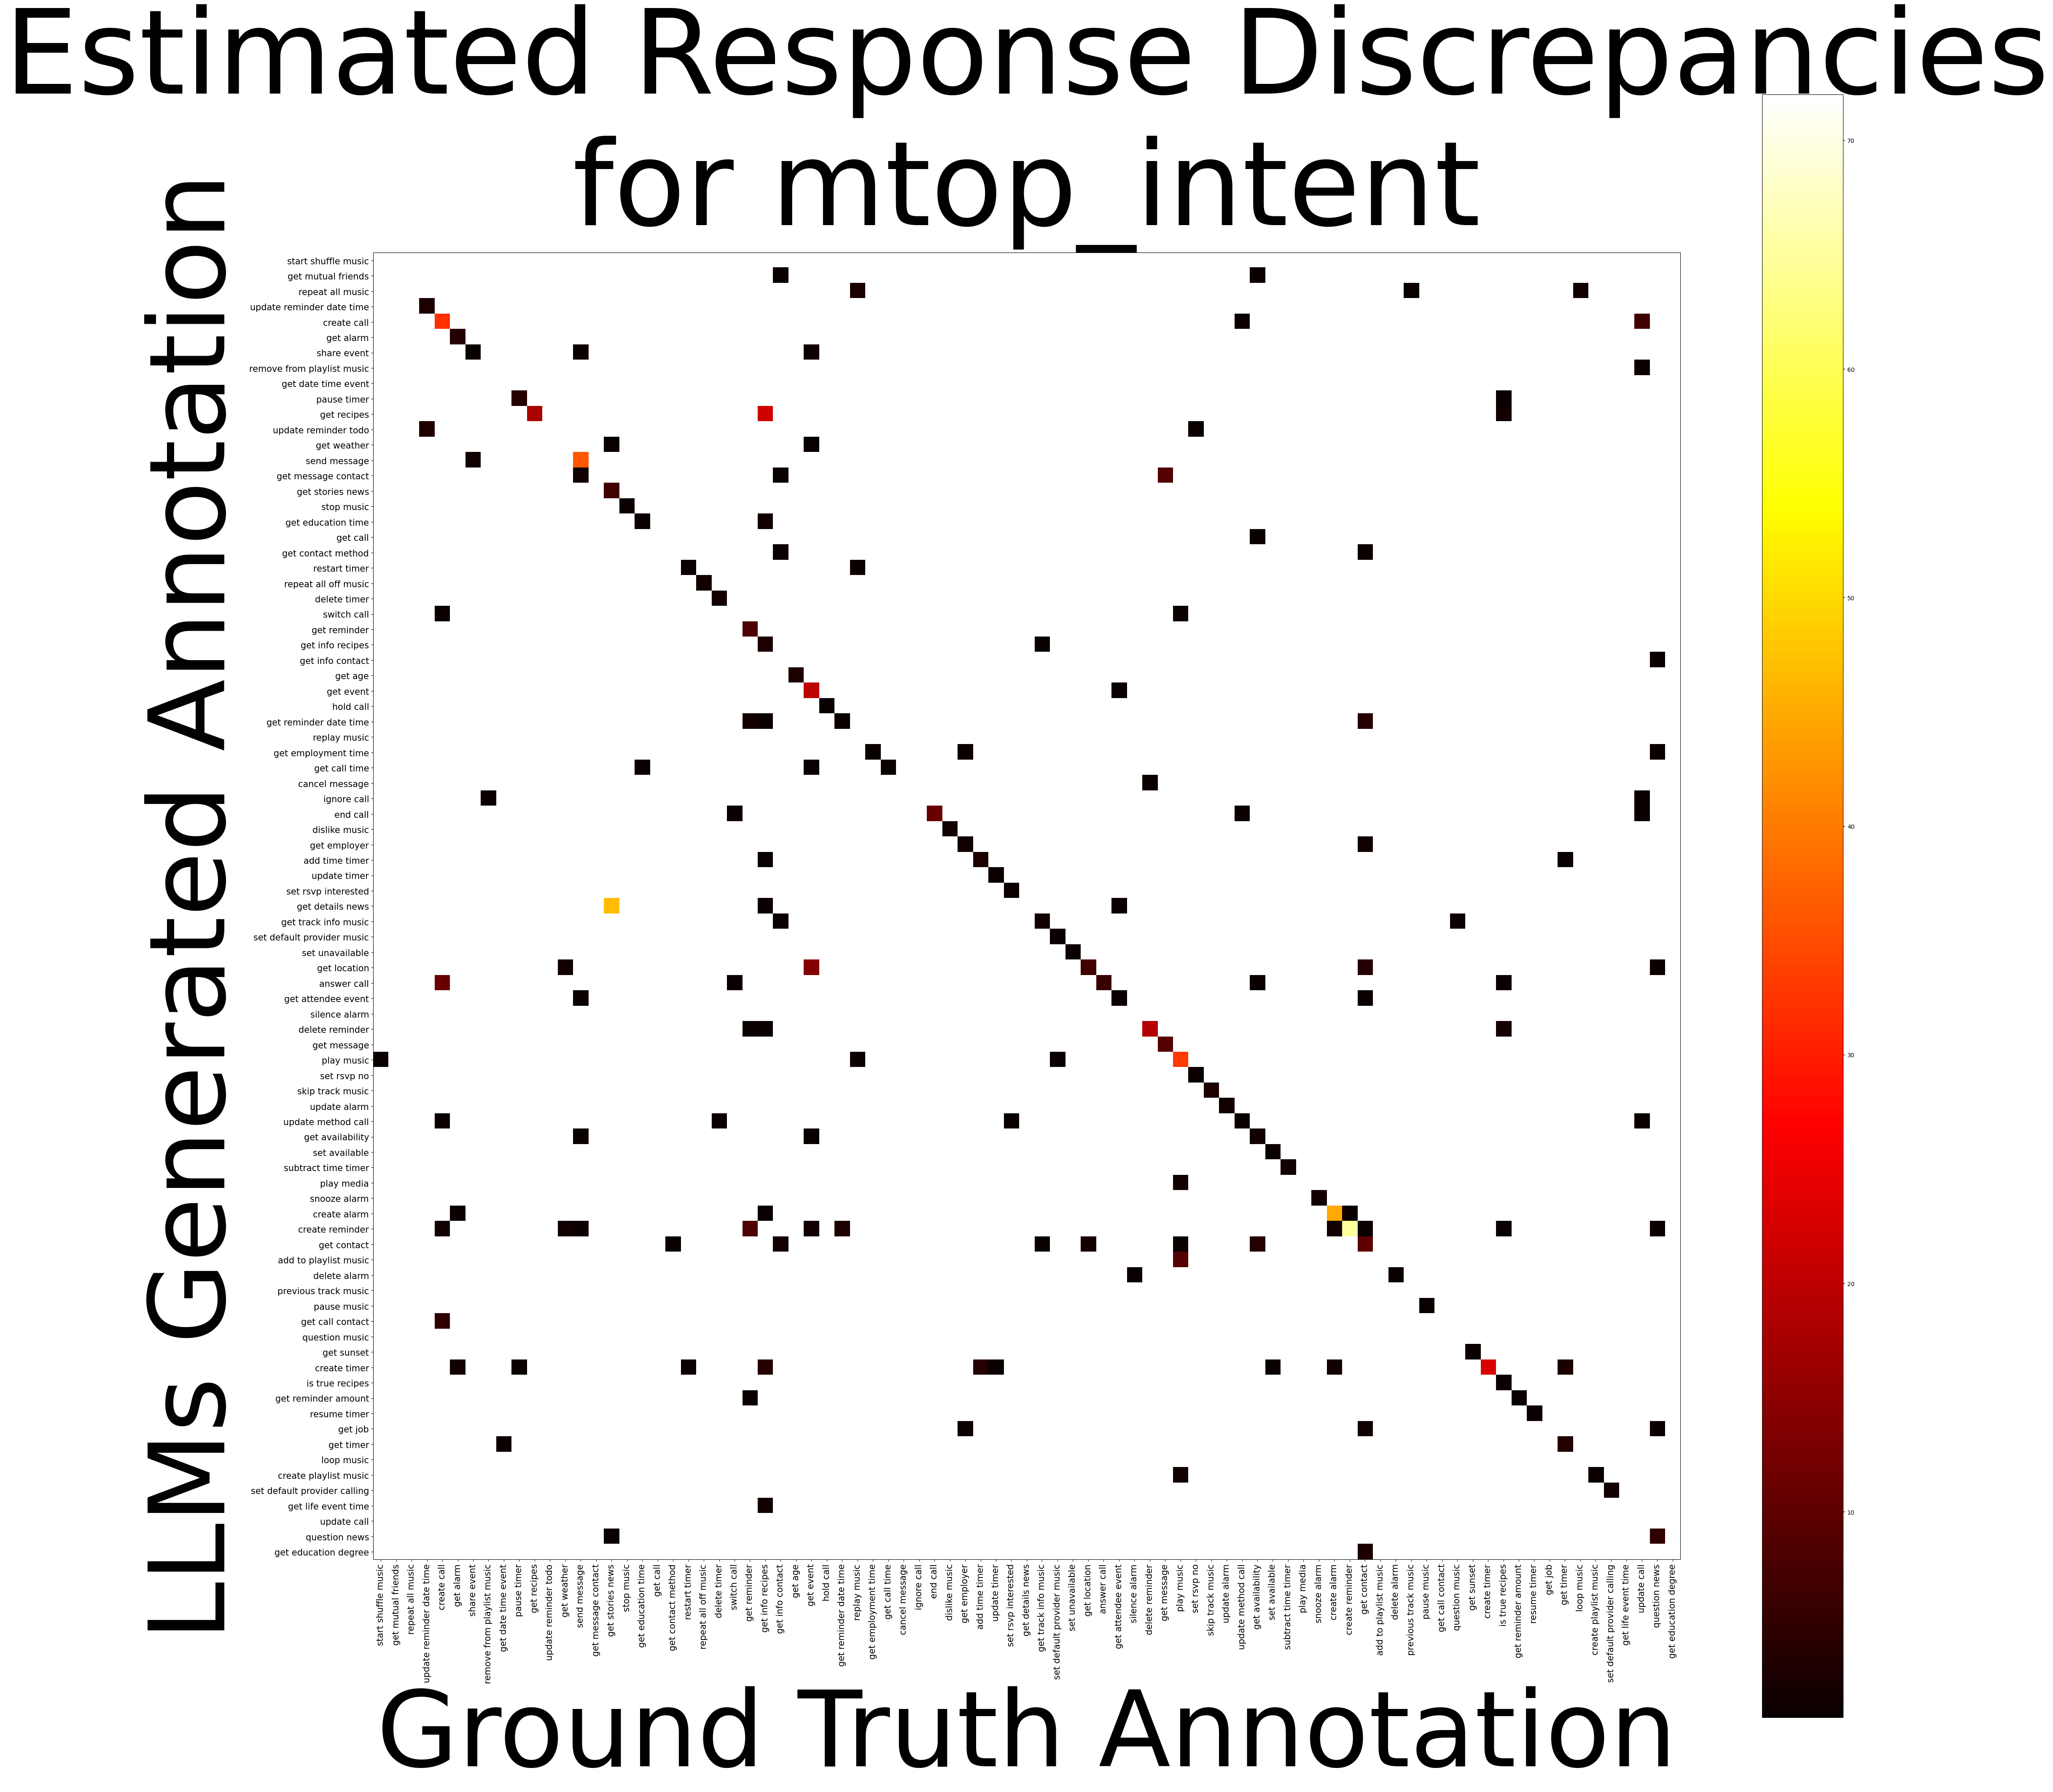

{'engineering.stackexchange.com.txt': 0, 'english.stackexchange.com.txt': 1, 'eosio.stackexchange.com.txt': 2, 'es.stackoverflow.com.txt': 3, 'esperanto.stackexchange.com.txt': 4, 'ethereum.stackexchange.com.txt': 5, 'expatriates.stackexchange.com.txt': 6, 'expressionengine.stackexchange.com.txt': 7, 'fitness.stackexchange.com.txt': 8, 'freelancing.stackexchange.com.txt': 9, 'french.stackexchange.com.txt': 10, 'gamedev.stackexchange.com.txt': 11, 'gaming.stackexchange.com.txt': 12, 'gardening.stackexchange.com.txt': 13, 'genealogy.stackexchange.com.txt': 14, 'german.stackexchange.com.txt': 15, 'gis.stackexchange.com.txt': 16, 'graphicdesign.stackexchange.com.txt': 17, 'ham.stackexchange.com.txt': 18, 'hardwarerecs.stackexchange.com.txt': 19, 'health.stackexchange.com.txt': 20, 'hermeneutics.stackexchange.com.txt': 21, 'hinduism.stackexchange.com.txt': 22, 'history.stackexchange.com.txt': 23, 'homebrew.stackexchange.com.txt': 24, 'hsm.stackexchange.com.txt': 25, 'interpersonal.stackexch

/var/folders/sv/t09lc4l93657c20yb6tqld_c0000gn/T/ipykernel_96558/4077070978.py:633: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_samples = random.sample(all_possible_indices, int(0.05 * len(large_inputs)))


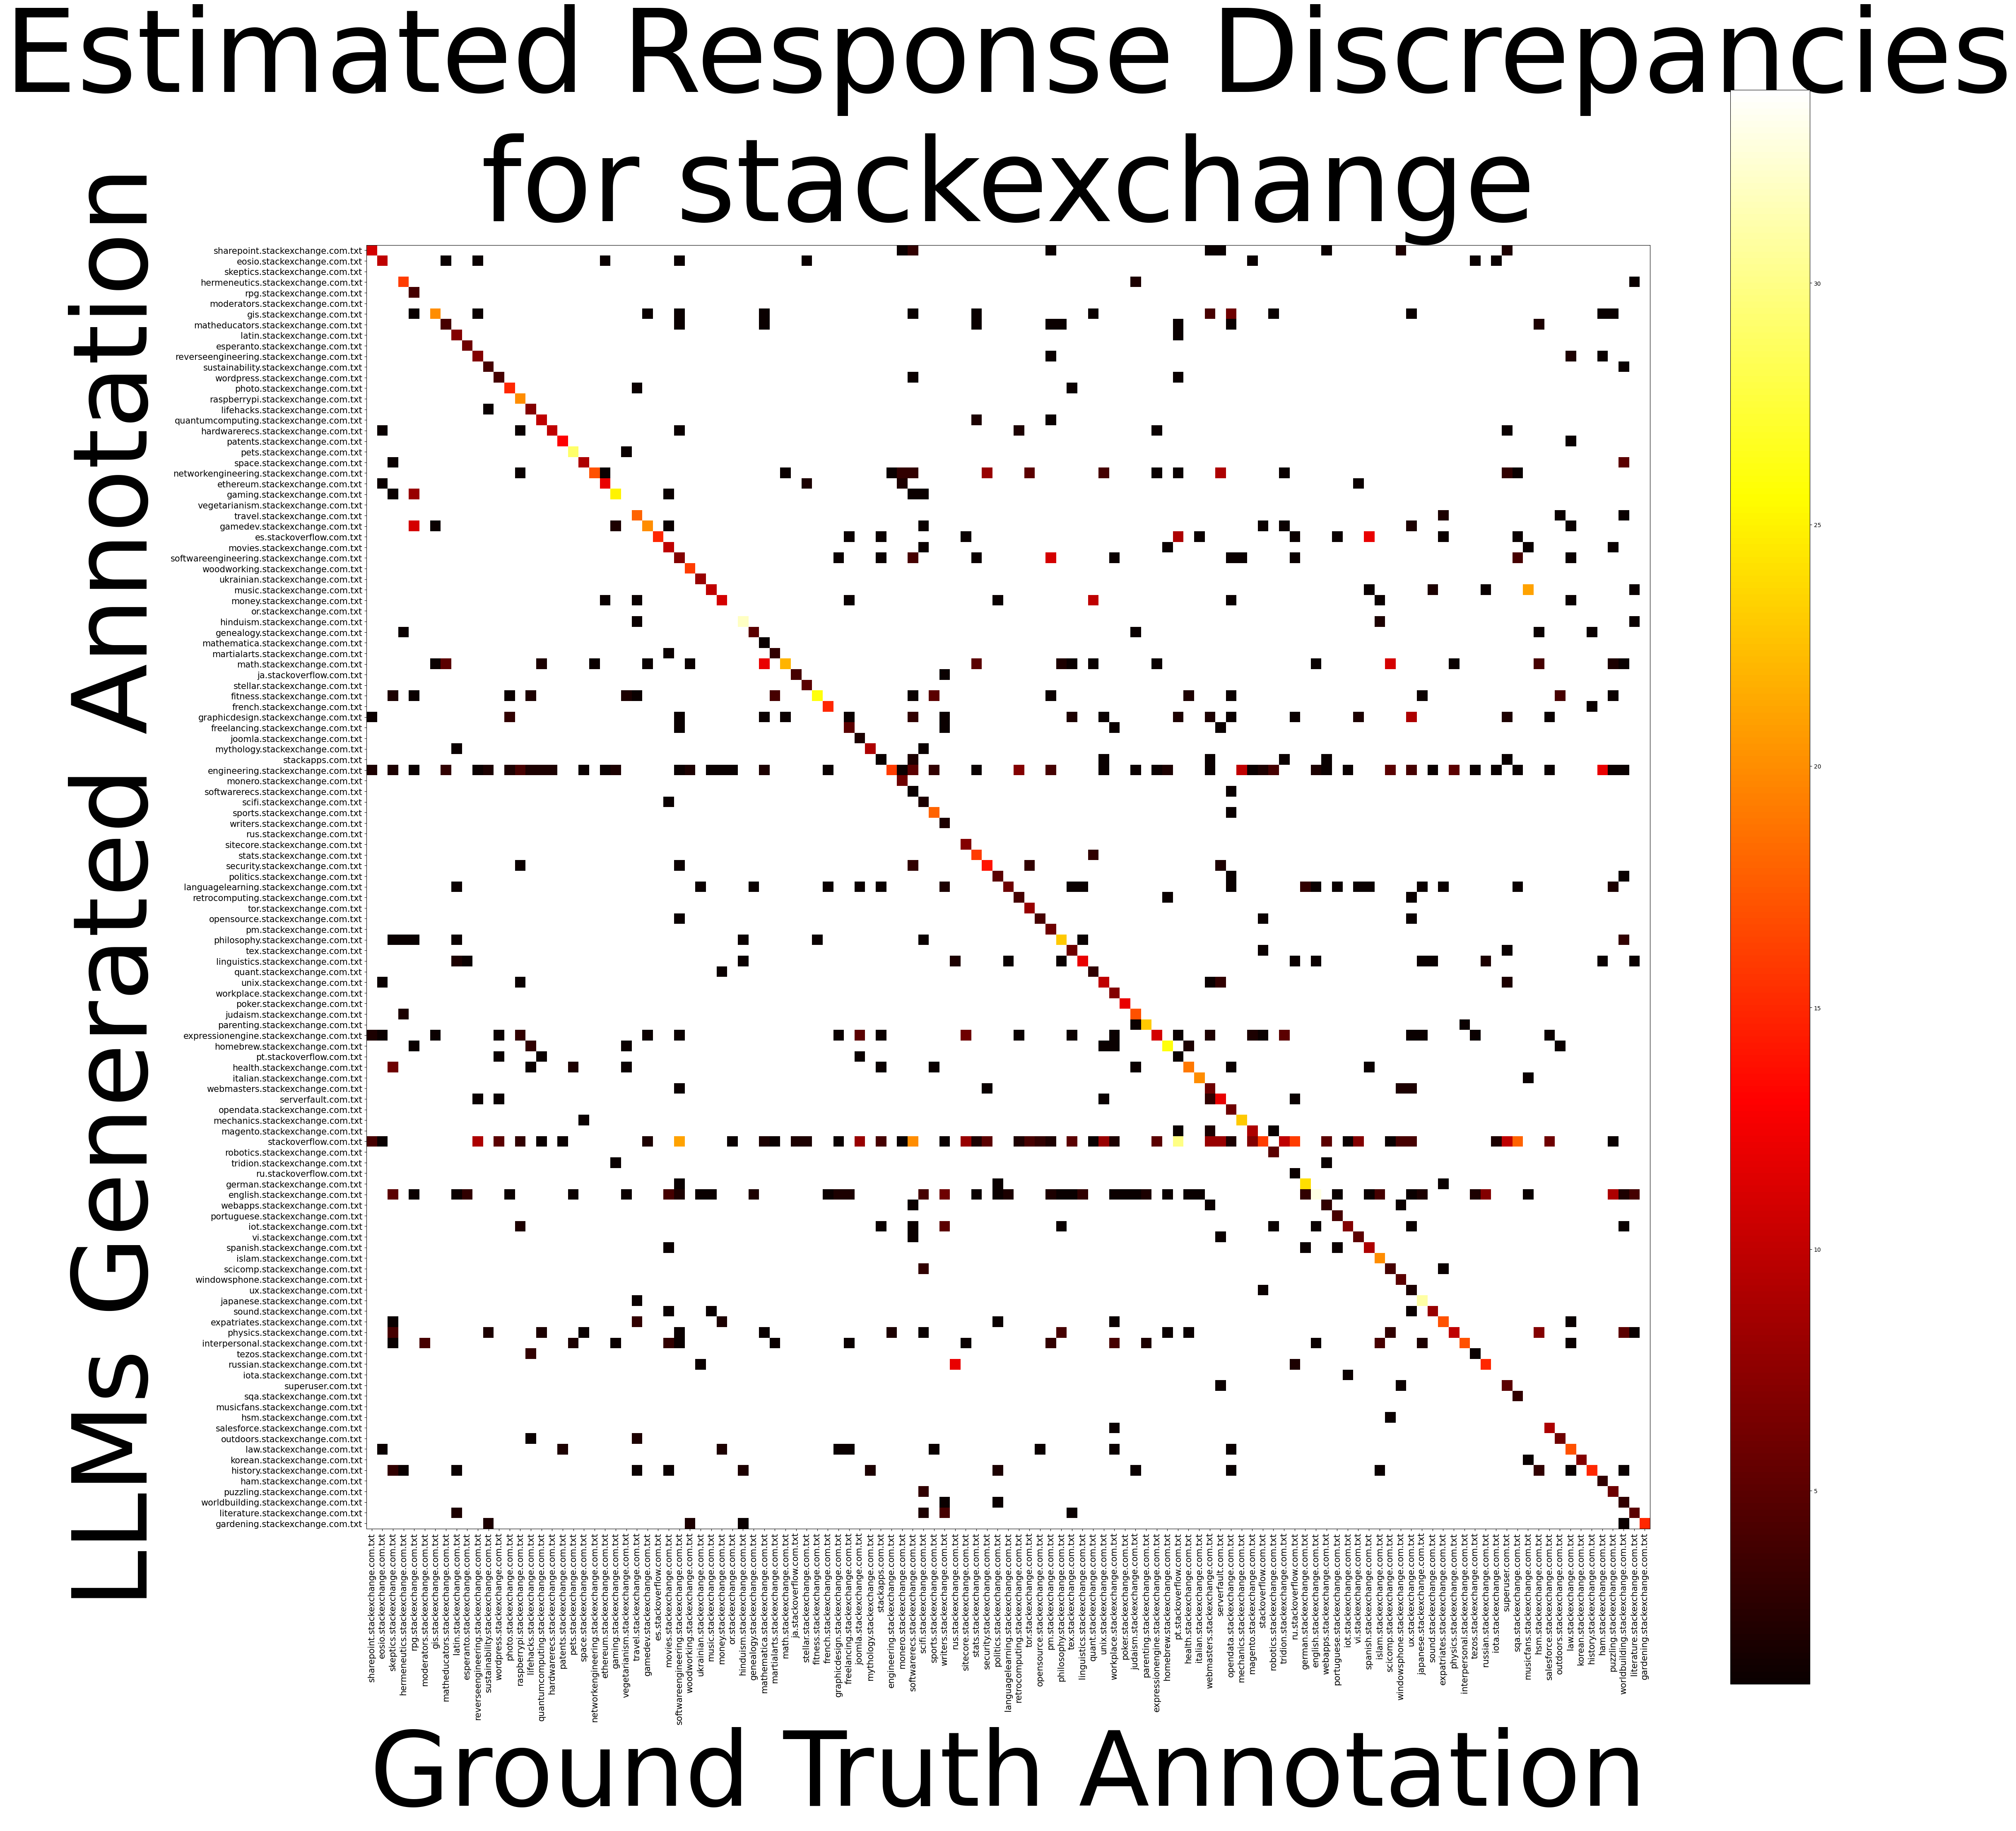

{'Refund not showing up': 0, 'activate my card': 1, 'age limit': 2, 'apple pay or google pay': 3, 'atm support': 4, 'automatic top up': 5, 'balance not updated after bank transfer': 6, 'balance not updated after cheque or cash deposit': 7, 'beneficiary not allowed': 8, 'cancel transfer': 9, 'card about to expire': 10, 'card acceptance': 11, 'card arrival': 12, 'card delivery estimate': 13, 'card linking': 14, 'card not working': 15, 'card payment fee charged': 16, 'card payment not recognised': 17, 'card payment wrong exchange rate': 18, 'card swallowed': 19, 'cash withdrawal charge': 20, 'cash withdrawal not recognised': 21, 'change pin': 22, 'compromised card': 23, 'contactless not working': 24, 'country support': 25, 'declined card payment': 26, 'declined cash withdrawal': 27, 'declined transfer': 28, 'direct debit payment not recognised': 29, 'disposable card limits': 30, 'edit personal details': 31, 'exchange charge': 32, 'exchange rate': 33, 'exchange via app': 34, 'extra charge 

/var/folders/sv/t09lc4l93657c20yb6tqld_c0000gn/T/ipykernel_96558/4077070978.py:633: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_samples = random.sample(all_possible_indices, int(0.05 * len(large_inputs)))


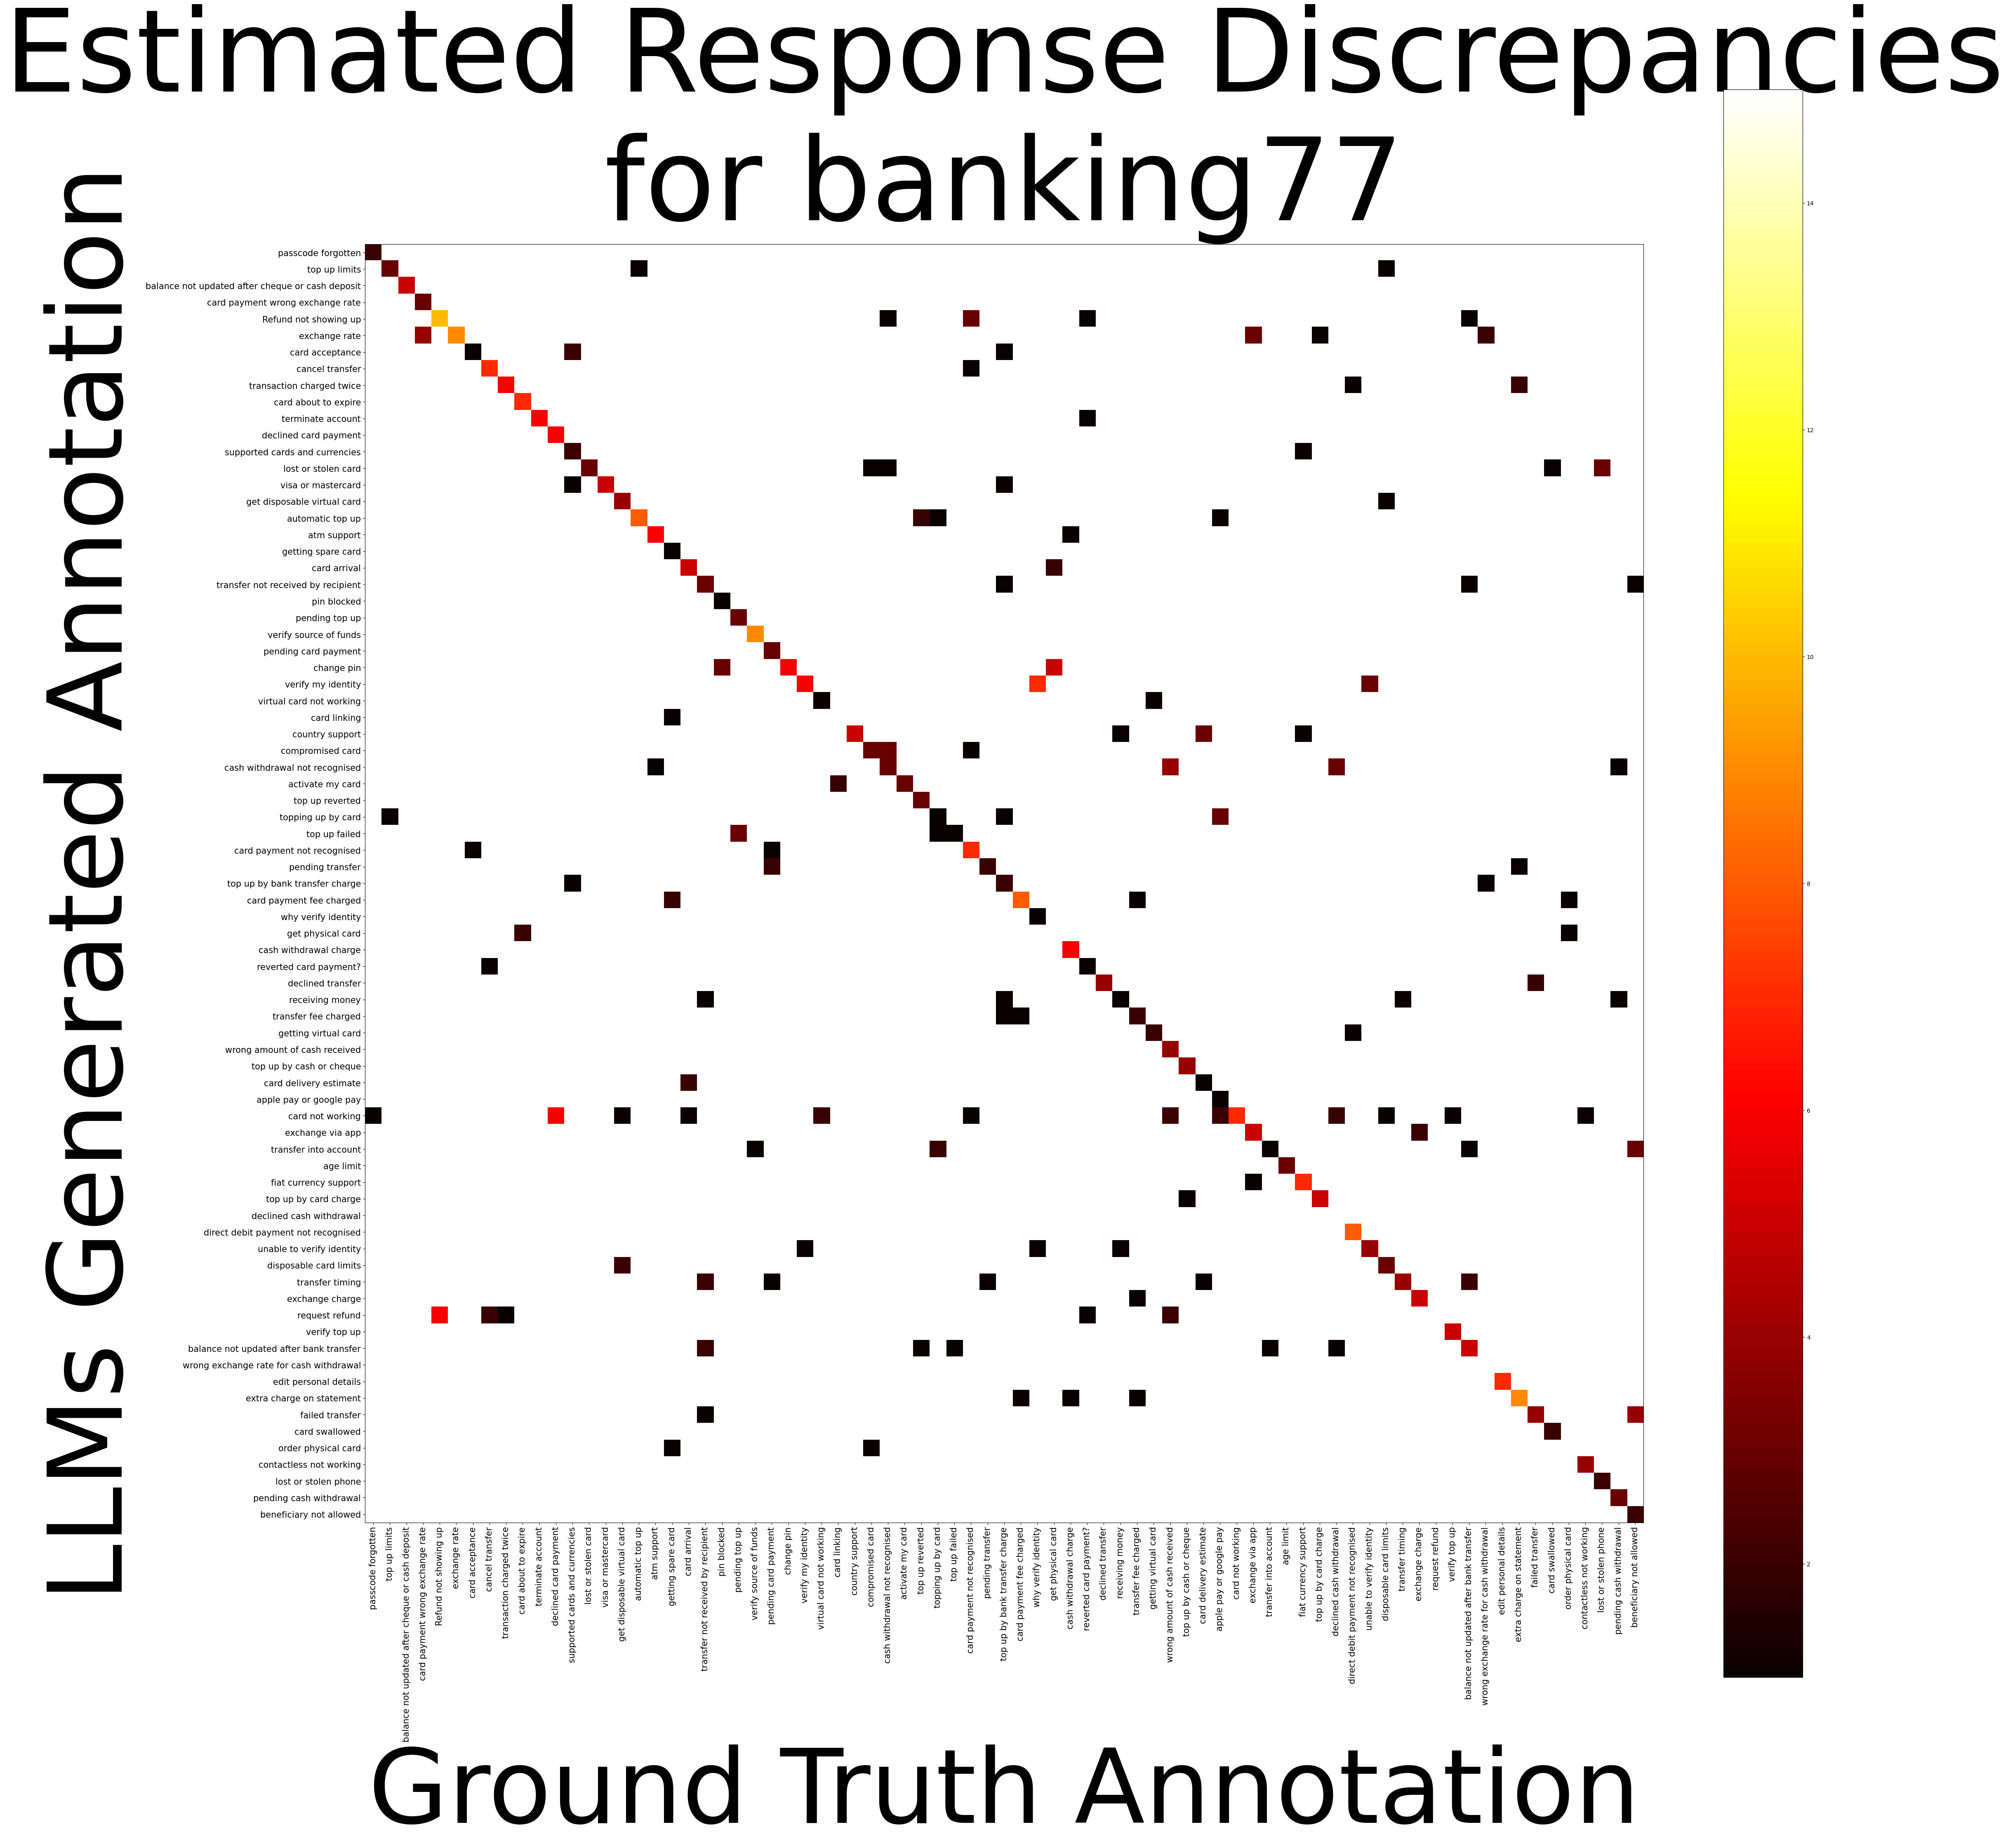

In [ ]:
import numpy as np
from collections import defaultdict
import time
import re
import ast
import time
import re
import ast
from collections import defaultdict
from gensim.models import Word2Vec
import json
# import json
import numpy as np
import matplotlib.pyplot as plt

def intent_to_index(intent_list, intent_to_index_mapping):
    return [[intent_to_index_mapping[intent] for intent in intent_set if intent in intent_to_index_mapping] for intent_set in intent_list]


def prompting1(prompts, true_intentions,intention_set, temperture, formats,formats1,formats2,formats3):
    combination=[]
    for prompt,true_label in zip(prompts,true_intentions):
        prompt1=f'For the sentence:"{prompt}"'
        # prompt1=f'For the sentence:"{prompt}"'

        combination.append(prompt1)

    respon = ''
    respon += f'Please ensure there are a total of {len(prompts)} responses. For these "{len(prompts)}" queries "{combination}", please identify the expressed intentions for each sentence based on the provided intention set \n{intention_set}, using the provided intents for guidance:'
    respon += f'\n\n The responses must be in the specified format: {formats}, {formats1},{formats2},{formats3}.'
    respon += f'\n\n Please ensure there are a total of {len(prompts)} responses from the chatgpt.'

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        # model="gpt-4",
        messages=[{"role": "user", "content": respon}],
        temperature=temperture,
        max_tokens=25*len(prompts)
    )
    print("response.choices[0].message.content:",response.choices[0].message.content)
    return response.choices[0].message.content
    
def load_labels_from_file(file_path):
    with open(file_path, 'r') as file:
        labels = file.read().splitlines()
    return labels

def load_labels_from_file1(file_path):
    with open(file_path, 'r') as file:
        labels = file.read()
    return labels

def load_and_convert_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the entire file content, which seems to be a single JSON array in text form
        data_str = file.read()
        # Convert the string representation of the list into an actual Python list
        data = json.loads(data_str)
    return data


import json
def load_and_clean_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data_json = json.load(file)

        cleaned_data = []
        for key, values in data_json.items():
            if isinstance(values, list):
                cleaned_data.extend(values)  # Extend with all intents in the list
            elif isinstance(values, str):
                cleaned_data.append(values)

    return cleaned_data
def process_responses1(lines, true_intentions,temperture,dataset_name,intention_set, step):
    if dataset_name=='clinc':
        formats = {'caring'}
        formats1 = {'surprise'}
        formats2 = {'admiration'}
        formats3 = {'application status'}
        with open('.../output/selected_data_clinc.json') as f:examples_new = json.load(f)

    if dataset_name=='stackexchange':

        formats = {'engineering.stackexchange.com.txt'}
        formats1 = {'writers.stackexchange.com.txt'}
        formats2 = {'wordpress.stackexchange.com.txt'}
        formats3 = {'law.stackexchange.com.txt'}

    if dataset_name=='banking77':

        formats = {'Refund not showing up'}
        formats1 = {'card not working'}
        formats2 = {'visa or mastercard'}
        formats3 = {'card not working'}

    if dataset_name=='mtop_intent':


        formats = {'delete playlist music'}

        formats1 = {'update reminder todo'}

        formats2 = {'update reminder location'}

        formats3 = {'get track info music'}


    if dataset_name=='massive_scenario':

        formats = {'weather'}

        formats1 = {'alarm'}

        formats2 = {'customer service'}

        formats3 = {'currency exchange'}




    all_responses = defaultdict(dict)
    predicted_intentions_list = defaultdict(list)
    valid_predictions = defaultdict(list)
    error_lines = []
    intent_arrays = []
    all_pred_indices = {}
    all_true_indices = {}
    total_line_index=0
    subset_accuracy_index=0
    true_counter_index=0
    true_counter=0
    subset_counter=0
    overall_index = 0
    subset_accuracy_index=0
    subset_counter_index=0
    subset_ratios = []
    matching_ratios = []
    all_good=0
    subset_number=[]
    matching_number =[]
    for line_index in range(0, len(lines), step):

        print("line_index:",line_index)
        actual_step = step if line_index + step <= len(lines) else len(lines) - line_index
        print("actual_step:",actual_step+line_index)

        selected_lines = lines[total_line_index:total_line_index+step]
        true_intentions1 = true_intentions[total_line_index:total_line_index+step]
    
        total_line_index += step
        attempt_counter = 0
        max_attempts = 1

        while attempt_counter < max_attempts:
            try:
                response = prompting1(selected_lines,true_intentions1, intention_set,temperture,formats,formats1,formats2,formats3)
                all_responses[line_index] = response
                predicted_intentions = re.findall(r"{(.+?)}", response)
                predicted_intentions = [ast.literal_eval("{" + intent_str + "}") for intent_str in predicted_intentions]
                predicted_intentions = [list(intent_dict.keys()) for intent_dict in predicted_intentions]
                predicted_intentions = [[item for item in sublist] for sublist in predicted_intentions]

                print("Predicted_annotation",predicted_intentions)
                print('True_annotation',true_intentions1)

                print(len(predicted_intentions) == step)
                attempt_counter += 1
                
                if len(predicted_intentions) == step:
                    break
                elif len(predicted_intentions[0])==step:
                    break
            except Exception as exc:
                attempt_counter += 1
                error_lines.extend([f'Error on line {overall_index + i}: {exc}' for i in range(len(selected_lines))])
                
        if len(predicted_intentions) == 0:
            error_messages = ['Error: No predictions'] * step
            predicted_intentions.extend(error_messages)
            
        elif len(predicted_intentions) > step:
            predicted_intentions = predicted_intentions[:step]

        elif len(predicted_intentions) < step:
            error_messages = ['Error: insufficient predictions'] * (step - len(predicted_intentions))
            predicted_intentions.extend(error_messages)
            
        if len(predicted_intentions) == step:
            print("all_good")
            all_good+=5
        else:
            print("not_good")
        

        print("Predicted_annotation",predicted_intentions)
        print('True_annotation',true_intentions1)


        clean_data = predicted_intentions
        # print("clean_data:",clean_data)
        true_intentions1 = [[item] for item in true_intentions1]

        def intent_to_index(intent_list, intent_to_index_mapping):
            return [[intent_to_index_mapping[intent] for intent in intent_set if intent in intent_to_index_mapping] for intent_set in intent_list]

        try:
            pred_indices = intent_to_index(clean_data, intent_to_index_mapping)
        except Exception:
            pred_indices = intent_to_index(clean_data, intent_to_index_mapping)

        true_indices = intent_to_index(true_intentions1, intent_to_index_mapping)

        for i, clean in enumerate(clean_data):
            predicted_intentions_list[overall_index] = clean
            if "Error" not in clean:  # If no error in the intention
                all_pred_indices[overall_index] = pred_indices[i]
                valid_predictions[overall_index] = clean
                all_true_indices[overall_index] = true_indices[i]
            else:  # If there is an error
                all_pred_indices[overall_index] = None  # Or any other value that signifies an error
                valid_predictions[overall_index] = None  # Or any other value that signifies an error
                all_true_indices[overall_index] =None
            overall_index += 1

        for i in range(len(true_intentions1)):
            is_subset = set(true_intentions1[i]).issubset(set(clean_data[i]))
            if is_subset:
                subset_counter += 1
            is_matching = set(true_intentions1[i]) == set(clean_data[i])
            if is_matching:
                true_counter += 1

        if all_good==total_line_index:
            print("all_good_so_far")
        if len(predicted_intentions_list) != total_line_index:
            print(f"Warning: total_line_index ({total_line_index}) and the length of predicted_intentions_list ({len(predicted_intentions_list)}) do not match!")
        else:
            print(f"Success: total_line_index ({total_line_index}) and the length of predicted_intentions_list ({len(predicted_intentions_list)}) match as expected.")

        if (total_line_index) % 20 == 0:
            file_name = f".../{dataset_name}/Clustering_{line_index}_LLM_response.txt"
            with open(file_name, "w") as file:
                for index, labels in predicted_intentions_list.items():
                    file.write(f"{index}: {labels}\n")
        

        if (total_line_index) % 20 == 0:
            file_name = f".../{dataset_name}/Clustering_{line_index}_lower_embeddings_rand_randoom4.txt"
            with open(file_name, "w") as file:
                for index, labels in all_responses.items():
                    file.write(f"{index}: {labels}\n")

        if (total_line_index) % 20 == 0:
            print("Ratio of subset predicted intents: ", subset_counter/total_line_index)
            print("Ratio of correctly matched intents: ", true_counter/total_line_index)
            print("Total subsets: ", subset_counter)
            print("Number of subset predicted intents_index: ", subset_counter_index)
            print("Number of correctly matched intents_index: ", subset_accuracy_index)

        subset_number.append(subset_counter)
        matching_number.append(true_counter)
        subset_ratios.append(subset_counter/total_line_index)
        matching_ratios.append(true_counter/total_line_index)        

    print("Ratio of correctly predicted intents: ", subset_counter_index/total_line_index)
    print("Number of correctly predicted intents: ", subset_counter_index)
    print("Total subsets: ", subset_counter)
    print("Total matching: ", true_counter)
    print("Total subsets ratio: ", subset_counter/len(lines))
    print("Total lines processed: ", len(lines))
    print("Total subsets: ", subset_counter)
    print("Error lines: ", len(error_lines))
    
    return true_counter,all_responses, predicted_intentions_list, valid_predictions, error_lines


top_10_sentences_indices = {}

def extract_inputs_and_labels(file_path):
    inputs = []
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            entry = json.loads(line)
            inputs.append(entry['input'])
            labels.append(entry['label'])
    return inputs, labels


import json
def load_and_clean_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data_json = json.load(file)

        cleaned_data = []
        for key, values in data_json.items():
            if isinstance(values, list):
                cleaned_data.extend(values)  # Extend with all intents in the list
            elif isinstance(values, str):
                cleaned_data.append(values)

    return cleaned_data
            
dataset_names=['clinc','massive_scenario','mtop_intent','stackexchange','banking77']

proportions = [0.01,0.05]
for temperture in [0.1]:
    for proportion in proportions:
        for dataset_name in dataset_names:

            large_inputs, large_labels = extract_inputs_and_labels(f'.../datasets/{dataset_name}/large.jsonl')
            large_inputs, large_labels = extract_inputs_and_labels(f'.../datasets/{dataset_name}/large.jsonl')

            selected_labels11 = large_labels
            selected_lines11 =large_inputs
            labels = np.unique(selected_labels11)

            # Generate the intent_to_index_mapping dictionary
            intent_to_index_mapping = {label: index for index, label in enumerate(labels)}
            intents = np.unique(np.array(large_labels)).tolist()
            intent_labeltoid = {intents[i]: i  for i in range(len(intents))}
            label_candidate_index=intent_labeltoid

            np.unique(large_labels)
            # Return a sample to show the split data
            (large_inputs[:3], large_labels[:3]), 
            # (small_inputs[:3], small_labels[:3])
            lines=large_inputs
            intent_set=np.unique(large_labels)
            intention_set=np.unique(large_labels)

            labels = np.unique(large_labels)

            # Generate the intent_to_index_mapping dictionary
            intent_to_index_mapping = {label: index for index, label in enumerate(labels)}

            # Print the generated dictionary
            print(intent_to_index_mapping)

            large_inputs, large_labels = extract_inputs_and_labels(f'.../datasets/{dataset_name}/large.jsonl')

            import random
            # Set the random seed for reproducibility
            random.seed(40)  # You can choose any integer value as the seed

            # Define the maximum possible index
            max_index = len(large_inputs)  # Adjust this number based on your data

            # Generate a list of all possible indices excluding those in Whole_indices
            all_possible_indices = set(range(max_index))

            # Check if there are at least 400 indices to sample from
            if len(all_possible_indices) >= 100:
                random_samples = random.sample(all_possible_indices, int(proportion * len(large_inputs)))
            else:
                print("Not enough elements to sample 400 unique indices outside Whole_indices.")

            print("400 Random Samples outside Whole_indices:", random_samples)
            print("400 Random Samples outside Whole_indices:", len(random_samples))

            selected_labels = [large_labels[index] for index in random_samples]
            
            selected_lines =  [large_inputs[index] for index in random_samples]

            true_counter,de_2000_all_responses_2_10_least, de_2000_predicted_intentions_list_2_10_least, de_2000_valid_predictions_2_10_least, de_2000_error_lines_2_10_least = process_responses1(selected_lines, selected_labels,temperture,dataset_name,intention_set, step=1)


        
            print("Total_exact_matching:",true_counter/(len(selected_lines)))


            file_name1 = f".../{dataset_name}/CM_ground_true_more_{dataset_name}_{temperture}.txt"
            with open(file_name1, 'w') as file:
                file.write(json.dumps(selected_labels, indent=4))

            # Specify the path to your ground truth file
            ground_truth_path = f'.../{dataset_name}/CM_ground_true_more_{dataset_name}_{temperture}.txt'
            # Load and convert the data
            ground_truth_data = load_and_convert_data(ground_truth_path)


            file_name1 = f'.../{dataset_name}/CM_more_{dataset_name}_{temperture}.txt'
            with open(file_name1, 'w') as file:
                file.write(json.dumps(de_2000_all_responses_2_10_least, indent=4))


            file_name111 = f'.../{dataset_name}/CM_more_{dataset_name}_{temperture}.txt'

            predictions11 = load_and_clean_data(file_name111)

            predictions111 = [item.strip("{''}") for item in predictions11]
            
            print("predictions111:",predictions111)


            def load_and_clean_data(file_path):
                with open(file_path, 'r', encoding='utf-8') as file:
                    data_json = json.load(file)

                    cleaned_data = []
                    for key, values in data_json.items():
                        if isinstance(values, list):
                            cleaned_data.extend(values)  # Extend with all intents in the list
                        elif isinstance(values, str):
                            cleaned_data.append(values)

                return cleaned_data



            predictions=predictions111
            ground_truth=ground_truth_data

            labels = list(set(ground_truth + predictions))

            # Initialize transition matrix with zeros
            transition_matrix = np.zeros((len(labels), len(labels)))

            # Iterate over ground truth and predictions
            for gt, pred in zip(ground_truth, predictions):
                # Get indices of ground truth and predicted labels
                gt_idx = labels.index(gt)
                pred_idx = labels.index(pred)
                
                # Increment count in transition matrix
                transition_matrix[gt_idx, pred_idx] += 1

            # Print transition matrix with labels
            print("Transition Matrix:")
            print("Ground Truth \\ Predicted\t" + "\t".join(labels))
            for i, label in enumerate(labels):
                print(f"{label}\t" + "\t".join(str(int(x)) for x in transition_matrix[i]))


            predictions = ground_truth_data
            ground_truth=predictions111
            # Unique labels
            labels = list(set(ground_truth + predictions))

            # Initialize transition matrix with zeros
            transition_matrix = np.zeros((len(labels), len(labels)))

            # Iterate over ground truth and predictions
            for gt, pred in zip(ground_truth, predictions):
                # Get indices of ground truth and predicted labels
                gt_idx = labels.index(gt)
                pred_idx = labels.index(pred)

                # Increment count in transition matrix
                transition_matrix[gt_idx, pred_idx] += 1

            # Create a dictionary to store the ground truth and predicted intents
            intent_table = {}

            # Iterate over the ground truth and predictions
            for gt, pred in zip(ground_truth, predictions):
                # If the ground truth intent is not in the dictionary, add it
                if gt not in intent_table:
                    intent_table[gt] = []
                # Add the predicted intent to the list of predicted intents for the ground truth intent
                intent_table[gt].append(pred)

            # Deduplicate the predicted intents for each ground truth intent
            for gt in intent_table:
                intent_table[gt] = list(set(intent_table[gt]))

            # # Save the intent frequency table to a JSON file
            with open(f'.../Masking_{dataset_name}_{proportion}.json', 'w') as file:
                json.dump(intent_table, file, indent=4)

            # print("The intent frequency table has been saved to 'intent_frequency_table.json'.")
            with open(f'.../Masking_{dataset_name}_{proportion}.json', 'r') as file:
                loaded_intent_table = json.load(file)

            print("loaded_intent_table:",intent_table)

            print("loaded_intent_table:",len(intent_table))

            green_mask = transition_matrix > 0
            masked_data = np.ma.masked_where(~green_mask, transition_matrix)

            # Plotting the heatmap
            plt.figure(figsize=(60, 55))
            plt.imshow(masked_data, cmap='hot', interpolation='nearest')
            plt.colorbar()
            plt.title(f'Estimated Response Discrepancies\nfor {dataset_name}', fontsize=200)
            plt.ylabel('LLMs Generated Annotation', fontsize=180)
            plt.xlabel('Ground Truth Annotation', fontsize=180)
            plt.xticks(np.arange(len(labels)), labels, rotation=90, fontsize=15)
            plt.yticks(np.arange(len(labels)), labels, fontsize=15)
            plt.show()

In [ ]:
import numpy as np
from collections import defaultdict
import time
import re
import ast
import time
import re
import ast
from collections import defaultdict
from gensim.models import Word2Vec
import json
# import json
import numpy as np
import matplotlib.pyplot as plt

def intent_to_index(intent_list, intent_to_index_mapping):
    return [[intent_to_index_mapping[intent] for intent in intent_set if intent in intent_to_index_mapping] for intent_set in intent_list]


def prompting1(prompts, true_intentions,intention_set, temperture, formats,formats1,formats2,formats3):
    combination=[]
    for prompt,true_label in zip(prompts,true_intentions):
        prompt1=f'For the sentence:"{prompt}"'
        # prompt1=f'For the sentence:"{prompt}"'

        combination.append(prompt1)

    respon = ''
    respon += f'Please ensure there are a total of {len(prompts)} responses. For these "{len(prompts)}" queries "{combination}", please identify the expressed intentions for each sentence based on the provided intention set \n{intention_set}, using the provided intents for guidance:'
    respon += f'\n\n The responses must be in the specified format: {formats}, {formats1},{formats2},{formats3}.'
    respon += f'\n\n Please ensure there are a total of {len(prompts)} responses from the chatgpt.'

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        # model="gpt-4o",
        messages=[{"role": "user", "content": respon}],
        temperature=temperture,
        max_tokens=25*len(prompts)
    )
    print("response.choices[0].message.content:",response.choices[0].message.content)
    return response.choices[0].message.content
    
def load_labels_from_file(file_path):
    with open(file_path, 'r') as file:
        labels = file.read().splitlines()
    return labels

def load_labels_from_file1(file_path):
    with open(file_path, 'r') as file:
        labels = file.read()
    return labels

def load_and_convert_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the entire file content, which seems to be a single JSON array in text form
        data_str = file.read()
        # Convert the string representation of the list into an actual Python list
        data = json.loads(data_str)
    return data


import json
def load_and_clean_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data_json = json.load(file)

        cleaned_data = []
        for key, values in data_json.items():
            if isinstance(values, list):
                cleaned_data.extend(values)  # Extend with all intents in the list
            elif isinstance(values, str):
                cleaned_data.append(values)

    return cleaned_data
def process_responses1(lines, true_intentions,temperture,dataset_name,intention_set, step):
    if dataset_name=='clinc':
        formats = {'caring'}
        formats1 = {'surprise'}
        formats2 = {'admiration'}
        formats3 = {'application status'}
        with open('.../output/selected_data_clinc.json') as f:examples_new = json.load(f)

    if dataset_name=='stackexchange':

        formats = {'engineering.stackexchange.com.txt'}
        formats1 = {'writers.stackexchange.com.txt'}
        formats2 = {'wordpress.stackexchange.com.txt'}
        formats3 = {'law.stackexchange.com.txt'}

    if dataset_name=='banking77':

        formats = {'Refund not showing up'}
        formats1 = {'card not working'}
        formats2 = {'visa or mastercard'}
        formats3 = {'card not working'}

    if dataset_name=='mtop_intent':


        formats = {'delete playlist music'}

        formats1 = {'update reminder todo'}

        formats2 = {'update reminder location'}

        formats3 = {'get track info music'}


    if dataset_name=='massive_scenario':

        formats = {'weather'}

        formats1 = {'alarm'}

        formats2 = {'customer service'}

        formats3 = {'currency exchange'}




    all_responses = defaultdict(dict)
    predicted_intentions_list = defaultdict(list)
    valid_predictions = defaultdict(list)
    error_lines = []
    intent_arrays = []
    all_pred_indices = {}
    all_true_indices = {}
    total_line_index=0
    subset_accuracy_index=0
    true_counter_index=0
    true_counter=0
    subset_counter=0
    overall_index = 0
    subset_accuracy_index=0
    subset_counter_index=0
    subset_ratios = []
    matching_ratios = []
    all_good=0
    subset_number=[]
    matching_number =[]
    for line_index in range(0, len(lines), step):

        print("line_index:",line_index)
        actual_step = step if line_index + step <= len(lines) else len(lines) - line_index
        print("actual_step:",actual_step+line_index)

        selected_lines = lines[total_line_index:total_line_index+step]
        true_intentions1 = true_intentions[total_line_index:total_line_index+step]
    
        total_line_index += step
        attempt_counter = 0
        max_attempts = 1

        while attempt_counter < max_attempts:
            try:
                response = prompting1(selected_lines,true_intentions1, intention_set,temperture,formats,formats1,formats2,formats3)
                all_responses[line_index] = response
                predicted_intentions = re.findall(r"{(.+?)}", response)
                predicted_intentions = [ast.literal_eval("{" + intent_str + "}") for intent_str in predicted_intentions]
                predicted_intentions = [list(intent_dict.keys()) for intent_dict in predicted_intentions]
                predicted_intentions = [[item for item in sublist] for sublist in predicted_intentions]

                print("Predicted_annotation",predicted_intentions)
                print('True_annotation',true_intentions1)

                print(len(predicted_intentions) == step)
                attempt_counter += 1
                
                if len(predicted_intentions) == step:
                    break
                elif len(predicted_intentions[0])==step:
                    break
            except Exception as exc:
                attempt_counter += 1
                error_lines.extend([f'Error on line {overall_index + i}: {exc}' for i in range(len(selected_lines))])
                
        if len(predicted_intentions) == 0:
            error_messages = ['Error: No predictions'] * step
            predicted_intentions.extend(error_messages)
            
        elif len(predicted_intentions) > step:
            predicted_intentions = predicted_intentions[:step]

        elif len(predicted_intentions) < step:
            error_messages = ['Error: insufficient predictions'] * (step - len(predicted_intentions))
            predicted_intentions.extend(error_messages)
            
        if len(predicted_intentions) == step:
            print("all_good")
            all_good+=5
        else:
            print("not_good")
        

        print("Predicted_annotation",predicted_intentions)
        print('True_annotation',true_intentions1)


        clean_data = predicted_intentions
        # print("clean_data:",clean_data)
        true_intentions1 = [[item] for item in true_intentions1]

        def intent_to_index(intent_list, intent_to_index_mapping):
            return [[intent_to_index_mapping[intent] for intent in intent_set if intent in intent_to_index_mapping] for intent_set in intent_list]

        try:
            pred_indices = intent_to_index(clean_data, intent_to_index_mapping)
        except Exception:
            pred_indices = intent_to_index(clean_data, intent_to_index_mapping)

        true_indices = intent_to_index(true_intentions1, intent_to_index_mapping)

        for i, clean in enumerate(clean_data):
            predicted_intentions_list[overall_index] = clean
            if "Error" not in clean:  # If no error in the intention
                all_pred_indices[overall_index] = pred_indices[i]
                valid_predictions[overall_index] = clean
                all_true_indices[overall_index] = true_indices[i]
            else:  # If there is an error
                all_pred_indices[overall_index] = None  # Or any other value that signifies an error
                valid_predictions[overall_index] = None  # Or any other value that signifies an error
                all_true_indices[overall_index] =None
            overall_index += 1

        for i in range(len(true_intentions1)):
            is_subset = set(true_intentions1[i]).issubset(set(clean_data[i]))
            if is_subset:
                subset_counter += 1
            is_matching = set(true_intentions1[i]) == set(clean_data[i])
            if is_matching:
                true_counter += 1

        if all_good==total_line_index:
            print("all_good_so_far")
        if len(predicted_intentions_list) != total_line_index:
            print(f"Warning: total_line_index ({total_line_index}) and the length of predicted_intentions_list ({len(predicted_intentions_list)}) do not match!")
        else:
            print(f"Success: total_line_index ({total_line_index}) and the length of predicted_intentions_list ({len(predicted_intentions_list)}) match as expected.")

        if (total_line_index) % 20 == 0:
            file_name = f".../{dataset_name}/Clustering_{line_index}_LLM_response.txt"
            with open(file_name, "w") as file:
                for index, labels in predicted_intentions_list.items():
                    file.write(f"{index}: {labels}\n")
        

        if (total_line_index) % 20 == 0:
            file_name = f".../{dataset_name}/Clustering_{line_index}_lower_embeddings_rand_randoom4.txt"
            with open(file_name, "w") as file:
                for index, labels in all_responses.items():
                    file.write(f"{index}: {labels}\n")

        if (total_line_index) % 20 == 0:
            print("Ratio of subset predicted intents: ", subset_counter/total_line_index)
            print("Ratio of correctly matched intents: ", true_counter/total_line_index)
            print("Total subsets: ", subset_counter)
            print("Number of subset predicted intents_index: ", subset_counter_index)
            print("Number of correctly matched intents_index: ", subset_accuracy_index)

        subset_number.append(subset_counter)
        matching_number.append(true_counter)
        subset_ratios.append(subset_counter/total_line_index)
        matching_ratios.append(true_counter/total_line_index)        

    print("Ratio of correctly predicted intents: ", subset_counter_index/total_line_index)
    print("Number of correctly predicted intents: ", subset_counter_index)
    print("Total subsets: ", subset_counter)
    print("Total matching: ", true_counter)
    print("Total subsets ratio: ", subset_counter/len(lines))
    print("Total lines processed: ", len(lines))
    print("Total subsets: ", subset_counter)
    print("Error lines: ", len(error_lines))
    
    return true_counter,all_responses, predicted_intentions_list, valid_predictions, error_lines


top_10_sentences_indices = {}

def extract_inputs_and_labels(file_path):
    inputs = []
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            entry = json.loads(line)
            inputs.append(entry['input'])
            labels.append(entry['label'])
    return inputs, labels


import json
def load_and_clean_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data_json = json.load(file)

        cleaned_data = []
        for key, values in data_json.items():
            if isinstance(values, list):
                cleaned_data.extend(values)  # Extend with all intents in the list
            elif isinstance(values, str):
                cleaned_data.append(values)

    return cleaned_data
            
dataset_names=['clinc','massive_scenario','mtop_intent','stackexchange','banking77']

proportions = [0.01,0.05]
for temperture in [0.1]:
    for proportion in proportions:
        for dataset_name in dataset_names:

            large_inputs, large_labels = extract_inputs_and_labels(f'.../datasets/{dataset_name}/large.jsonl')
            large_inputs, large_labels = extract_inputs_and_labels(f'.../datasets/{dataset_name}/large.jsonl')

            selected_labels11 = large_labels
            selected_lines11 =large_inputs
            labels = np.unique(selected_labels11)

            # Generate the intent_to_index_mapping dictionary
            intent_to_index_mapping = {label: index for index, label in enumerate(labels)}
            intents = np.unique(np.array(large_labels)).tolist()
            intent_labeltoid = {intents[i]: i  for i in range(len(intents))}
            label_candidate_index=intent_labeltoid

            np.unique(large_labels)
            # Return a sample to show the split data
            (large_inputs[:3], large_labels[:3]), 
            # (small_inputs[:3], small_labels[:3])
            lines=large_inputs
            intent_set=np.unique(large_labels)
            intention_set=np.unique(large_labels)

            labels = np.unique(large_labels)

            # Generate the intent_to_index_mapping dictionary
            intent_to_index_mapping = {label: index for index, label in enumerate(labels)}

            # Print the generated dictionary
            print(intent_to_index_mapping)

            large_inputs, large_labels = extract_inputs_and_labels(f'.../datasets/{dataset_name}/large.jsonl')

            import random
            # Set the random seed for reproducibility
            random.seed(40)  # You can choose any integer value as the seed

            # Define the maximum possible index
            max_index = len(large_inputs)  # Adjust this number based on your data

            # Generate a list of all possible indices excluding those in Whole_indices
            all_possible_indices = set(range(max_index))

            # Check if there are at least 400 indices to sample from
            if len(all_possible_indices) >= 100:
                random_samples = random.sample(all_possible_indices, int(proportion * len(large_inputs)))
            else:
                print("Not enough elements to sample 400 unique indices outside Whole_indices.")

            print("400 Random Samples outside Whole_indices:", random_samples)
            print("400 Random Samples outside Whole_indices:", len(random_samples))

            selected_labels = [large_labels[index] for index in random_samples]
            
            selected_lines =  [large_inputs[index] for index in random_samples]

            true_counter,de_2000_all_responses_2_10_least, de_2000_predicted_intentions_list_2_10_least, de_2000_valid_predictions_2_10_least, de_2000_error_lines_2_10_least = process_responses1(selected_lines, selected_labels,temperture,dataset_name,intention_set, step=1)


        
            print("Total_exact_matching:",true_counter/(len(selected_lines)))


            file_name1 = f".../{dataset_name}/CM_ground_true_more_{dataset_name}_{temperture}.txt"
            with open(file_name1, 'w') as file:
                file.write(json.dumps(selected_labels, indent=4))

            # Specify the path to your ground truth file
            ground_truth_path = f'.../{dataset_name}/CM_ground_true_more_{dataset_name}_{temperture}.txt'
            # Load and convert the data
            ground_truth_data = load_and_convert_data(ground_truth_path)


            file_name1 = f'.../{dataset_name}/CM_more_{dataset_name}_{temperture}.txt'
            with open(file_name1, 'w') as file:
                file.write(json.dumps(de_2000_all_responses_2_10_least, indent=4))


            file_name111 = f'.../{dataset_name}/CM_more_{dataset_name}_{temperture}.txt'

            predictions11 = load_and_clean_data(file_name111)

            predictions111 = [item.strip("{''}") for item in predictions11]
            
            print("predictions111:",predictions111)


            def load_and_clean_data(file_path):
                with open(file_path, 'r', encoding='utf-8') as file:
                    data_json = json.load(file)

                    cleaned_data = []
                    for key, values in data_json.items():
                        if isinstance(values, list):
                            cleaned_data.extend(values)  # Extend with all intents in the list
                        elif isinstance(values, str):
                            cleaned_data.append(values)

                return cleaned_data



            predictions=predictions111
            ground_truth=ground_truth_data

            labels = list(set(ground_truth + predictions))

            # Initialize transition matrix with zeros
            transition_matrix = np.zeros((len(labels), len(labels)))

            # Iterate over ground truth and predictions
            for gt, pred in zip(ground_truth, predictions):
                # Get indices of ground truth and predicted labels
                gt_idx = labels.index(gt)
                pred_idx = labels.index(pred)
                
                # Increment count in transition matrix
                transition_matrix[gt_idx, pred_idx] += 1

            # Print transition matrix with labels
            print("Transition Matrix:")
            print("Ground Truth \\ Predicted\t" + "\t".join(labels))
            for i, label in enumerate(labels):
                print(f"{label}\t" + "\t".join(str(int(x)) for x in transition_matrix[i]))


            predictions = ground_truth_data
            ground_truth=predictions111
            # Unique labels
            labels = list(set(ground_truth + predictions))

            # Initialize transition matrix with zeros
            transition_matrix = np.zeros((len(labels), len(labels)))

            # Iterate over ground truth and predictions
            for gt, pred in zip(ground_truth, predictions):
                # Get indices of ground truth and predicted labels
                gt_idx = labels.index(gt)
                pred_idx = labels.index(pred)

                # Increment count in transition matrix
                transition_matrix[gt_idx, pred_idx] += 1

            # Create a dictionary to store the ground truth and predicted intents
            intent_table = {}

            # Iterate over the ground truth and predictions
            for gt, pred in zip(ground_truth, predictions):
                # If the ground truth intent is not in the dictionary, add it
                if gt not in intent_table:
                    intent_table[gt] = []
                # Add the predicted intent to the list of predicted intents for the ground truth intent
                intent_table[gt].append(pred)

            # Deduplicate the predicted intents for each ground truth intent
            for gt in intent_table:
                intent_table[gt] = list(set(intent_table[gt]))

            # # Save the intent frequency table to a JSON file
            with open(f'.../Masking_{dataset_name}_{proportion}.json', 'w') as file:
                json.dump(intent_table, file, indent=4)

            # print("The intent frequency table has been saved to 'intent_frequency_table.json'.")
            with open(f'.../Masking_{dataset_name}_{proportion}.json', 'r') as file:
                loaded_intent_table = json.load(file)

            print("loaded_intent_table:",intent_table)

            print("loaded_intent_table:",len(intent_table))

            green_mask = transition_matrix > 0
            masked_data = np.ma.masked_where(~green_mask, transition_matrix)

            # Plotting the heatmap
            plt.figure(figsize=(60, 55))
            plt.imshow(masked_data, cmap='hot', interpolation='nearest')
            plt.colorbar()
            plt.title(f'Estimated Response Discrepancies\nfor {dataset_name}', fontsize=200)
            plt.ylabel('LLMs Generated Annotation', fontsize=180)
            plt.xlabel('Ground Truth Annotation', fontsize=180)
            plt.xticks(np.arange(len(labels)), labels, rotation=90, fontsize=15)
            plt.yticks(np.arange(len(labels)), labels, fontsize=15)
            plt.show()